In [8]:
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt  

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

In [38]:
median_salary = df.pivot_table(values = "salary_year_avg", index = "job_country", columns = "job_title_short", aggfunc = "median")

In [39]:
median_salary

job_title_short,Business Analyst,Cloud Engineer,Data Analyst,Data Engineer,Data Scientist,Machine Learning Engineer,Senior Data Analyst,Senior Data Engineer,Senior Data Scientist,Software Engineer
job_country,,,,,,,,,,
Albania,NaN,NaN,49950.00,NaN,69981.25,NaN,NaN,NaN,157500.0,NaN
Algeria,NaN,NaN,44100.00,45000.0,NaN,NaN,NaN,NaN,NaN,NaN
Argentina,71100.0,197500.0,92771.75,96773.0,71000.00,101029.0,NaN,147500.0,NaN,174500.0
Armenia,NaN,NaN,100500.00,48750.0,NaN,87021.0,NaN,NaN,NaN,NaN
Australia,70000.0,110000.0,109500.00,106712.5,139216.00,101029.0,50640.0,147500.0,157500.0,118350.0
...,...,...,...,...,...,...,...,...,...,...
Uruguay,NaN,NaN,100500.00,NaN,NaN,50000.0,NaN,NaN,57500.0,NaN
Uzbekistan,NaN,NaN,NaN,NaN,30750.00,NaN,NaN,NaN,NaN,NaN
Vietnam,79200.0,NaN,75550.00,96773.0,70000.00,57600.0,105837.5,147500.0,79200.0,53600.0


In [66]:
top_countries = df['job_country'].value_counts().head(3).index
top_countries

Index(['United States', 'India', 'United Kingdom'], dtype='object', name='job_country')

In [67]:
median_salary = median_salary.loc[top_countries]
median_salary

job_title_short,Business Analyst,Cloud Engineer,Data Analyst,Data Engineer,Data Scientist,Machine Learning Engineer,Senior Data Analyst,Senior Data Engineer,Senior Data Scientist,Software Engineer
job_country,,,,,,,,,,
United States,90000.0,116100.0,90000.0,125000.0,130000.0,150000.0,110000.0,150000.0,155000.0,130000.0
India,64800.0,NaN,100500.0,147500.0,114008.0,79200.0,111175.0,147500.0,149653.0,79200.0
United Kingdom,56700.0,NaN,87750.0,110000.0,105300.0,149653.0,111175.0,147500.0,157500.0,89100.0


In [54]:
we_got_what_we_needed = median_salary[["Data Analyst", "Data Engineer", "Data Scientist"]]

<Axes: xlabel='job_country'>

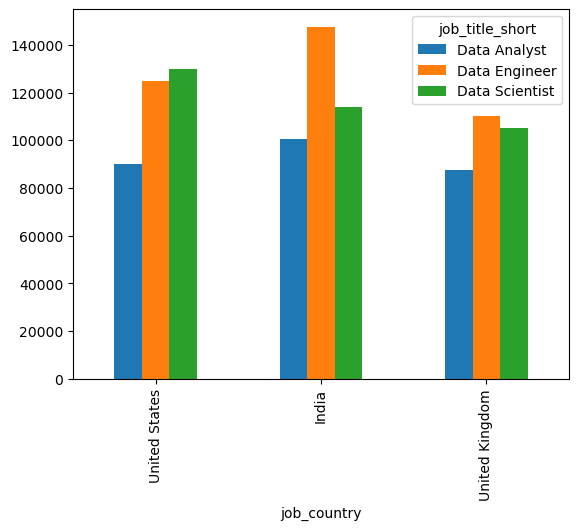

In [56]:
we_got_what_we_needed.plot(kind = "bar")

In [83]:
hourly =   df.pivot_table("salary_hour_avg", index = "job_title_short", columns = "job_country", aggfunc= "mean")
country_list = df["job_country"].value_counts().head(3).index
country_list

Index(['United States', 'India', 'United Kingdom'], dtype='object', name='job_country')

<Axes: xlabel='job_title_short'>

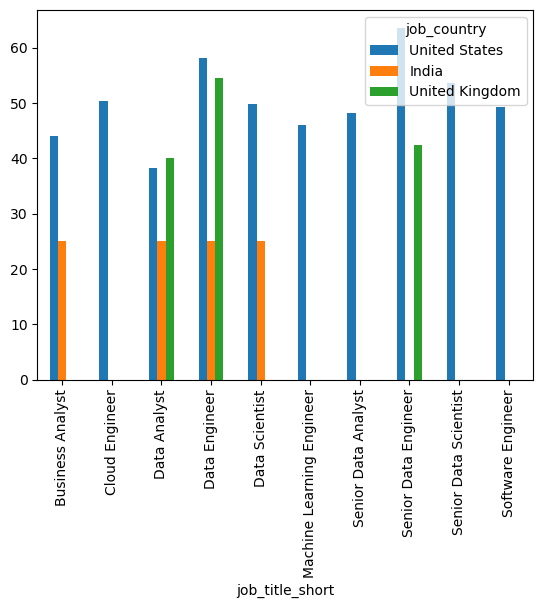

In [87]:
hourly = hourly[country_list]
hourly.plot(kind = "bar")
